# Project Name: Iris Flower Classification

This project aims to develop a machine learning model that can accurately classify Iris flowers into their respective species based on their sepal and petal measurements. The Iris dataset, which contains measurements of four features (sepal length, sepal width, petal length, and petal width) from 150 Iris flowers, will be used for training and testing the model. The three target species are Iris setosa, Iris virginica, and Iris versicolor.

### Import Libraries and Packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [31]:
df = sns.load_dataset('iris')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

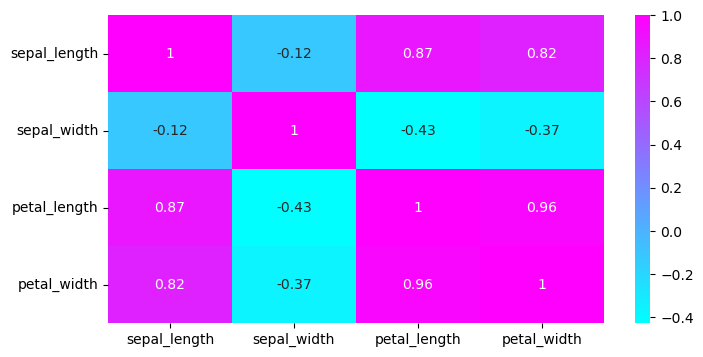

In [34]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

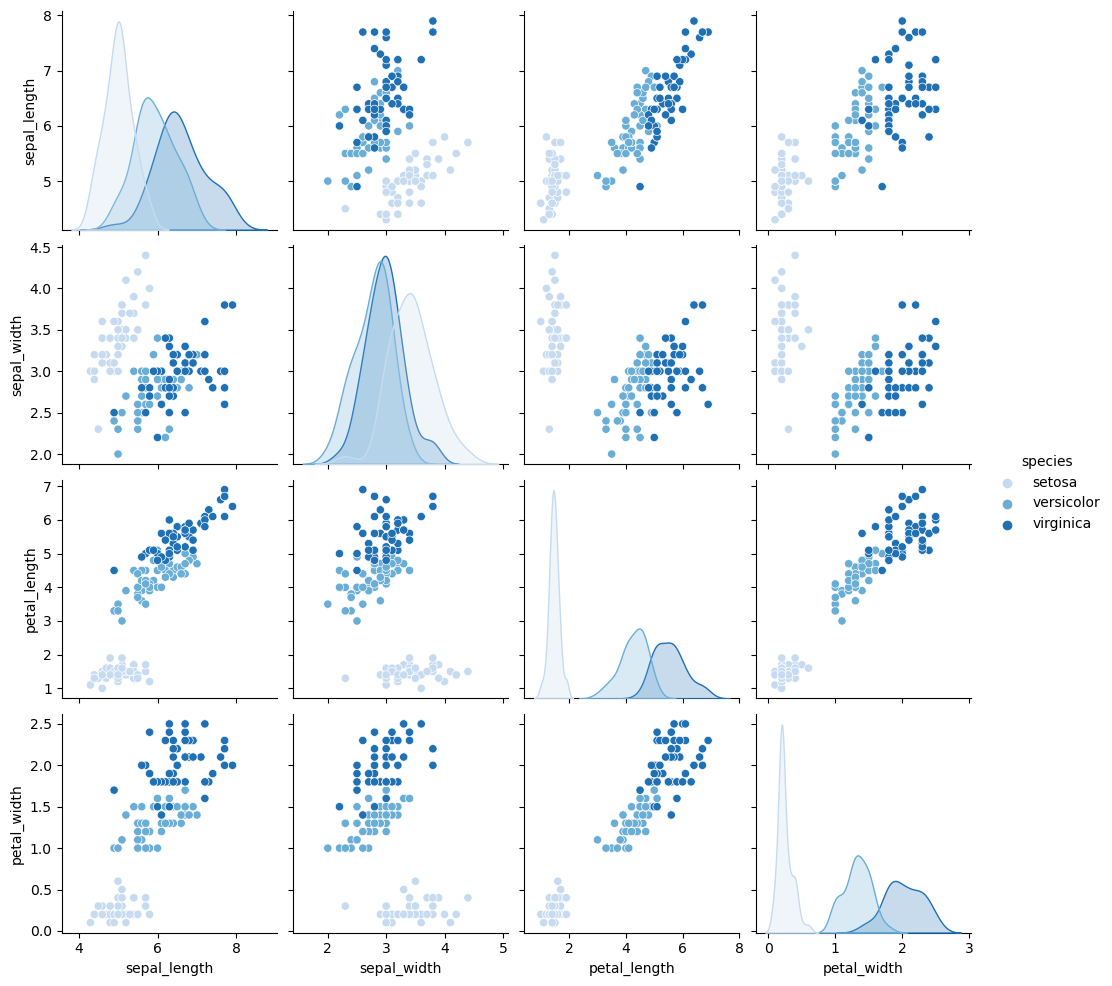

In [35]:
sns.pairplot(df, hue='species', palette = 'Blues')

Apparently, this dataset has balanced composition, with each of the three Iris flower species—namely, Iris Setosa, Iris Versicolor, and Iris Virginica—equally represented by 50 samples. This balance ensures a fair distribution across classes, making it an ideal resource for classification tasks. The dataset's attributes, including sepal length, sepal width, petal length, and petal width, are continuous and numeric, allowing for precise measurements. Additionally, the dataset's relatively small size and straightforward structure.

### Preprocessing & Missing Values/Null Values Imputation

In [36]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [37]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [38]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [39]:
df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

The dataset is quite clean and doesn't contain any missing or null values.

### Model Building

In [40]:
x = df.drop("species",axis=1)
y = df["species"]

#### Splitting Train and Test sets

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
x_train.shape

(112, 4)

In [43]:
x_test.shape

(38, 4)

In [44]:
y_train.shape

(112,)

In [45]:
y_test.shape

(38,)

#### Rescaling datasets

In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### K-Nearest Neighbors (KNN)

In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_model_pred = knn_model.predict(x_test)

#### Model Evaluation

In [48]:
print('Accuracy',accuracy_score(y_test, knn_model_pred))

print('----------------------------------------')

print('Confussion matrix:\n',confusion_matrix(y_test,  knn_model_pred))

print('-----------------------------------------')

print('Classification_reaport is: \n',classification_report(y_test,  knn_model_pred))

Accuracy 1.0
----------------------------------------
Confussion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
-----------------------------------------
Classification_reaport is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Random Forest

In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model_pred = rf_model.predict(x_test)

#### Model Evaluation

In [50]:
print('Accuracy',accuracy_score(y_test, rf_model_pred))

print('----------------------------------------')

print('Confussion matrix:\n',confusion_matrix(y_test, rf_model_pred))

print('-----------------------------------------')

print('Classification_reaport is: \n',classification_report(y_test, rf_model_pred))

Accuracy 1.0
----------------------------------------
Confussion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
-----------------------------------------
Classification_reaport is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### XGBoost

In [51]:
XG_model = XGBClassifier()
XG_model = XG_model.fit(x_train, y_train)
XG_model_pred = XG_model.predict(x_test)

#### Model Evaluation

In [52]:
print('Accuracy',accuracy_score(y_test, XG_model_pred))

print('----------------------------------------')

print('Confussion matrix:\n',confusion_matrix(y_test, XG_model_pred))

print('-----------------------------------------')

print('Classification_reaport is: \n',classification_report(y_test, XG_model_pred))

Accuracy 1.0
----------------------------------------
Confussion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
-----------------------------------------
Classification_reaport is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Conclusion

From the evaluation of the three models, it is evident that all of them achieve a 100% accuracy rate. This indicates that these models consistently make precise predictions across all classes. Both the confusion matrices and classification reports affirm their exceptional performance, as precision, recall, and F1-scores uniformly reach perfection at 1.0 for every class. These results underscore the high reliability of the models, as they do not make any classification errors within the dataset. However, it's important to consider the possibility of overfitting due to the small dataset size.